<ipython-input-5-7d75b3dad169>:46: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-7d75b3dad169>:50: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('q6_response_by_education_and_income.png', dpi=300, bbox_inches='tight')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


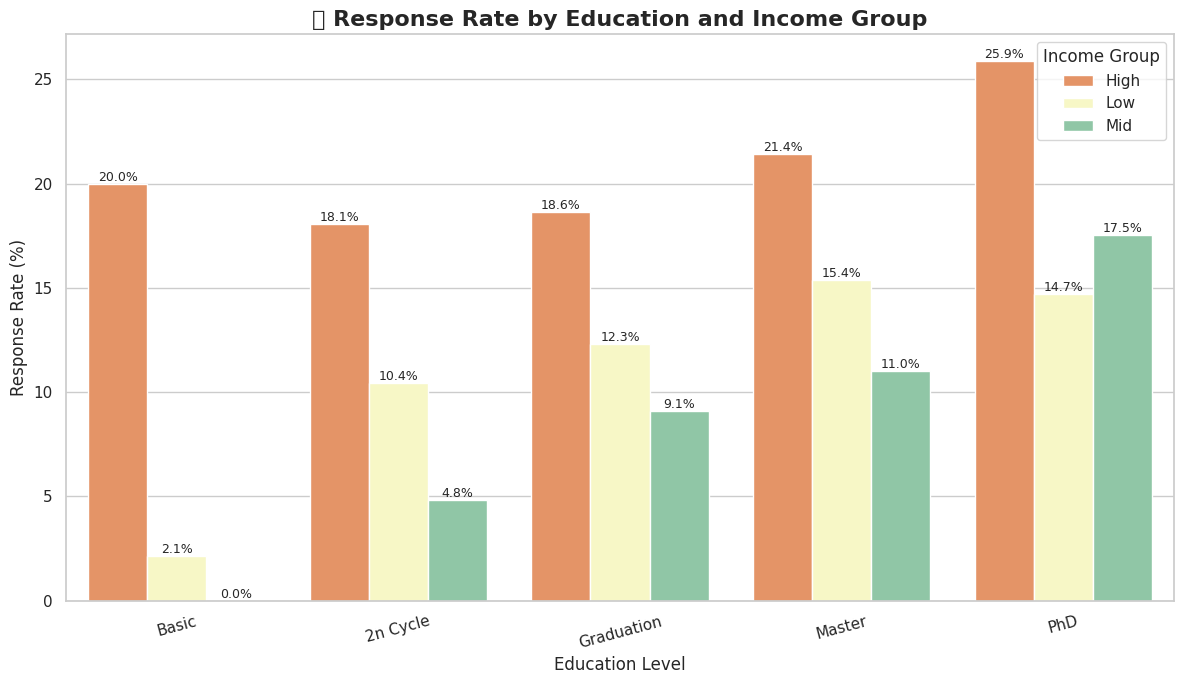

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
url = 'https://raw.githubusercontent.com/Data-Matt0/marketing-campaign-dashboard/refs/heads/main/data/queries/q6_response_by_edu_income.csv'
df = pd.read_csv(url)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Define correct order for education
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)

# Sort the dataframe to reflect this order
df = df.sort_values(['education', 'income_group'])

# Set visual style
sns.set(style='whitegrid')

# Initialize the figure
plt.figure(figsize=(12, 7))

# Create grouped bar chart
barplot = sns.barplot(
    data=df,
    x='education',
    y='response_rate_percent',
    hue='income_group',
    palette='Spectral'
)

# Add percentage labels to each bar
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

# Title and labels
plt.title('📊 Response Rate by Education and Income Group', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Response Rate (%)', fontsize=12)
plt.xticks(rotation=15)
plt.legend(title='Income Group', title_fontsize=12, fontsize=11)

# Improve layout
plt.tight_layout()


# Save plot as PNG
plt.savefig('q6_response_by_education_and_income.png', dpi=300, bbox_inches='tight')


# Show plot
plt.show()
